# Librerias y funciones necesarias

Las siguientes librerias son comunes en entornos de programación en Python, especialmente en el contexto de análisis de datos y ciencia de datos.

* **Pandas (import pandas as pd):**
>Pandas es una biblioteca de Python que proporciona estructuras de datos flexibles y herramientas de análisis de datos. La importación as pd es una convención común para abreviar el nombre de la biblioteca y hacer que el código sea más conciso. Pandas es ampliamente utilizado para manipular y analizar conjuntos de datos tabulares.

* **NumPy (import numpy as np):**
>NumPy es una biblioteca fundamental en Python para realizar operaciones numéricas. Proporciona un conjunto de funciones y herramientas para trabajar con arreglos y matrices multidimensionales, lo que lo hace esencial para la computación científica y el análisis de datos. La importación as np es una convención común para abreviar el nombre de la biblioteca y facilitar la escritura de código. NumPy es ampliamente utilizado en el ámbito de la ciencia de datos, aprendizaje automático y otras disciplinas relacionadas con el análisis numérico.

* **%load_ext autoreload y %autoreload 2:**
>Estos comandos son específicos de los cuadernos Jupyter y se utilizan para recargar automáticamente módulos antes de ejecutar una celda. %load_ext autoreload habilita la recarga automática de módulos, y %autoreload 2 configura la recarga automática para que sea más agresiva y recargue incluso las funciones de los módulos.

* **Warnings (import warnings):**
>El módulo warnings proporciona herramientas para controlar las advertencias que emite Python. En este caso, se está configurando para ignorar las advertencias, lo cual puede ser útil para evitar que las advertencias llenen la salida de la consola y distraigan durante la ejecución del código.
En resumen, estas importaciones son comunes en entornos de análisis de datos y ciencia de datos en Python, y proporcionan herramientas para manipular datos, trabajar con JSON, analizar expresiones regulares y controlar advertencias. Además, los comandos %load_ext autoreload y %autoreload 2 son específicos de los cuadernos Jupyter y se utilizan para facilitar el desarrollo interactivo.

In [23]:
import numpy as np
import pandas as pd
from datetime import datetime, time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Funcion verificar_tipos_datos**

La función verificar_tipo_datos toma un DataFrame de Pandas como entrada y realiza un análisis detallado de cada columna. Genera un resumen que incluye el nombre de la columna, el tipo de datos, el porcentaje de valores no nulos, el porcentaje de valores nulos y la cantidad de valores nulos para cada columna. Además, la función imprime el total de valores nulos en todo el DataFrame y muestra las columnas con valores nulos ordenadas de mayor a menor según el porcentaje de valores nulos. El resultado es un DataFrame que proporciona una visión detallada de la calidad de los datos en el DataFrame original.

In [24]:
import pandas as pd

def verificar_tipo_datos(df):
    # Diccionario para almacenar información sobre cada columna
    mi_dict = {"nombre_campo": [], "tipo_datos": [], "no_nulos_%": [], "nulos_%": [], "nulos": []}

    # Iterar sobre todas las columnas del DataFrame df
    for columna in df.columns:
        # Calcular el porcentaje de valores no nulos en la columna actual
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100

        # Agregar información al diccionario
        mi_dict["nombre_campo"].append(columna)
        mi_dict["tipo_datos"].append(df[columna].apply(type).unique())
        mi_dict["no_nulos_%"].append(round(porcentaje_no_nulos, 2))
        mi_dict["nulos_%"].append(round(100 - porcentaje_no_nulos, 2))
        mi_dict["nulos"].append(df[columna].isnull().sum())

    # Crear un DataFrame con la información recopilada
    df_info = pd.DataFrame(mi_dict)

    # Calcular el total de valores nulos en el DataFrame
    total_nulos = df.isnull().sum().sum()

    # Imprimir el total de valores nulos
    print(f'Total de valores nulos en el DataFrame: {total_nulos}')

    # Mostrar las columnas con valores nulos y sus respectivos porcentajes (ordenadas de mayor a menor)
    columnas_con_nulos = df_info[df_info["nulos"] > 0][["nombre_campo", "nulos_%"]].sort_values(by="nulos_%", ascending=False)
    if not columnas_con_nulos.empty:
        print("\nColumnas con valores nulos y sus porcentajes:")
        print(columnas_con_nulos)

    # Devolver el DataFrame con la información de cada columna
    return df_info


**Verificar duplicados por columnas**

La siguiente función proporciona una herramienta util para identificar y ordenar las filas duplicadas de un DataFrame de Pandas en función de los valores de una columna específica. En nuestro caso puede ser útil para el análisis de datos cuando se desea examinar y manejar duplicados en función de una columna particular.

In [25]:
def verifica_duplicados_por_columna(df, columna):

    # Se filtran las filas duplicadas
    duplicated_rows = df[df.duplicated(subset=columna, keep=False)]
    if duplicated_rows.empty:
        return "No hay duplicados"

    # se ordenan las filas duplicadas para comparar entre sí
    duplicated_rows_sorted = duplicated_rows.sort_values(by=columna)
    return duplicated_rows_sorted

**Obtener tipo de datos**

Esta función, llamada obtener_tipos_de_datos, toma un DataFrame de pandas como entrada y devuelve un nuevo DataFrame que contiene información sobre los tipos de datos presentes en cada columna del DataFrame original.

In [26]:
def obtener_tipos_de_datos(dataframe):
    # Inicializa una lista vacía para almacenar la información de tipos de datos
    tipos_de_datos = []

    # Itera sobre las columnas del DataFrame
    for columna in dataframe.columns:
        # Para cada columna, crea una lista de tipos de datos de los elementos en esa columna
        tipos = [str(type(dato)) for dato in dataframe[columna]]

        # Convierte la lista de tipos a un conjunto para eliminar duplicados y luego vuelve a convertir a lista
        tipos_unicos = list(set(tipos))

        # Agrega un diccionario a la lista tipos_de_datos con el nombre de la columna y los tipos de datos únicos
        tipos_de_datos.append({
            'Columna': columna,
            'Tipo de dato': tipos_unicos
        })

    # Crea un nuevo DataFrame con la información de tipos_de_datos
    resultado = pd.DataFrame(tipos_de_datos)

    # Devuelve el DataFrame resultante
    return resultado

**Converir tiempo**

Esta función es flexible y trata de convertir la entrada en un objeto de tiempo, ya sea a partir de una cadena con formato específico o extrayendo el componente de tiempo de un objeto de fecha y hora. Si no puede realizar la conversión, devuelve None o el valor original, dependiendo del caso.

In [27]:
def convertir_tiempo(x):
    if isinstance(x, str):
        try:
            return datetime.strptime(x, "%H:%M:%S").time()
        except ValueError:
            return None
    elif isinstance(x, datetime):
        return x.time()
    return x


**Imputa valor frecuente**

Esta función reemplaza los valores "SD" con NaN en la columna especificada,
luego calcula el valor más frecuente en esa columna y utiliza ese valor
para imputar los valores faltantes (NaN).

In [28]:
def imputa_valor_frecuente(df, columna):

    # Se reemplaza "SD" con NaN en la columna
    df[columna] = df[columna].replace('SD', pd.NA)

    # Se calcula el valor más frecuente en la columna
    valor_mas_frecuente = df[columna].mode().iloc[0]
    print(f'El valor mas frecuente es: {valor_mas_frecuente}')

    # Se imputan los valores NaN con el valor más frecuente
    df[columna].fillna(valor_mas_frecuente, inplace=True)

**Imputa edad media segun sexo**

Esta función reemplaza los valores "SD" con NaN en la columna 'Edad', calcula la edad promedio
para cada grupo de género (Femenino y Masculino), imprime los promedios calculados y
luego llena los valores faltantes en la columna 'Edad' utilizando el promedio correspondiente
al género al que pertenece cada fila en el DataFrame.

In [29]:
def imputa_edad_media_segun_sexo(df):

    # Se reemplaza "SD" con NaN en la columna 'edad'
    df['Edad'] = df['Edad'].replace('SD', pd.NA)

    # Se calcula el promedio de edad para cada grupo de género
    promedio_por_genero = df.groupby('Sexo')['Edad'].mean()
    print(f'La edad promedio de Femenino es {round(promedio_por_genero["FEMENINO"])} y de Masculino es {round(promedio_por_genero["MASCULINO"])}')

    # Se llenan los valores NaN en la columna 'edad' utilizando el promedio correspondiente al género
    df['Edad'] = df.apply(lambda row: promedio_por_genero[row['Sexo']] if pd.isna(row['Edad']) else row['Edad'], axis=1)
    # Lo convierte a entero
    df['Edad'] = df['Edad'].astype(int)

# Abrimos nuestro archivo `1_homicidios_limpio`

In [30]:
# Dirección del archivo CSV
direccion_csv = '/content/drive/MyDrive/Henry - Proyecto N°2 - Data Analysis/Datasets/1_homicidios_limpio.csv'

# Leer el archivo CSV y cargarlo en un DataFrame
df_homicidios = pd.read_csv(direccion_csv)

In [31]:
# Eliminar la columna 'Unnamed: 0'
df_homicidios = df_homicidios.drop('Unnamed: 0', axis=1)

In [32]:
df_homicidios.sample(10,random_state=5)

,Id,Rol,Sexo,Edad,N victimas,Fecha,Año,Mes,Día,Hora,...,Calle,Cruce,Dirección normalizada,Comuna,XY (CABA),Pos x,Pos y,Participantes,Víctima,Acusado
521,2019-0086,CONDUCTOR,MASCULINO,29,1,2019-10-15,2019,10,15,14:10:00,...,CORRIENTES AV.,NO,CORRIENTES AV. 6700,15,Point (100960.33601283 104532.07598431),-58.452832,-34.588416,MOTO-PASAJEROS,MOTO,PASAJEROS
698,2021-0079,PEATON,MASCULINO,39,1,2021-10-25,2021,10,25,03:30:00,...,TUCUMAN,NO,TUCUMAN 3112,3,Point (104940.36054625 103137.08602294),-58.409441,-34.600979,PEATON-AUTO,PEATON,AUTO
300,2018-0015,CONDUCTOR,MASCULINO,28,2,2018-02-06,2018,2,6,01:00:00,...,AUSTRALIA AV.,NO,AUSTRALIA AV. 2800,4,Point (107053.47849253 98047.93724144),-58.386363,-34.646843,MOTO-PASAJEROS,MOTO,PASAJEROS
713,2021-0093,PASAJERO_ACOMPAÑANTE,FEMENINO,18,1,2021-12-13,2021,12,13,17:10:00,...,RIESTRA AV.,SI,RIESTRA AV. y MOM,7,Point (102728.60090138 98186.24929177),-58.433538,-34.645616,MOTO-AUTO,MOTO,AUTO
23,2016-0034,PEATON,MASCULINO,52,1,2016-03-12,2016,3,12,12:30:00,...,"ALCORTA, AMANCIO AV.",SI,"ALCORTA, AMANCIO AV. y BONAVENA, OSCAR NATALIO",4,Point (105230.98315750 97613.97258373),-58.406239,-34.650765,PEATON-PASAJEROS,PEATON,PASAJEROS
541,2020-0003,PEATON,MASCULINO,44,1,2020-01-11,2020,1,11,06:00:00,...,RIVADAVIA AV.,SI,RIVADAVIA AV. y COMBATE DE LOS POZOS,3,Point (106413.35913221 102215.84332055),-58.393376,-34.609276,PEATON-AUTO,PEATON,AUTO
123,2016-0153,PEATON,FEMENINO,83,1,2016-11-25,2016,11,25,15:42:00,...,ARAOZ,SI,ARAOZ y CORDOBA AV.,15,Point (103130.82393478 103817.27945358),-58.429171,-34.594855,PEATON-MOTO,PEATON,MOTO
395,2018-0105,PEATON,FEMENINO,56,1,2018-10-03,2018,10,3,18:12:00,...,NAZCA AV.,SI,NAZCA AV. y RIVADAVIA AV.,7,Point (99418.67591727 99840.67619219),-58.469640,-34.630706,PEATON-PASAJEROS,PEATON,PASAJEROS
343,2018-0055,CONDUCTOR,MASCULINO,21,1,2018-05-29,2018,5,29,07:30:00,...,INDEPENDENCIA AV.,SI,INDEPENDENCIA AV. y JUJUY AV.,3,Point (105482.77183741 101155.54165898),-58.403516,-34.618839,MOTO-AUTO,MOTO,AUTO
72,2016-0096,CONDUCTOR,MASCULINO,39,1,2016-07-25,2016,7,25,07:00:00,...,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,NO,AUTOPISTA DELLEPIANE LUIS TTE. GRAL.,8,0,-58.474332,-34.666850,MOTO-CARGAS,MOTO,CARGAS


# Introducción al Análisis Exploratorio de Datos (EDA)

El Análisis Exploratorio de Datos (EDA) es una fase crucial en el proceso de análisis de datos que busca comprender la naturaleza y las características de un conjunto de datos antes de aplicar modelos más avanzados o llegar a conclusiones. En este EDA, nos enfocaremos en un conjunto de datos relacionado con incidentes viales, abordando diferentes aspectos para extraer información valiosa y patrones significativos. El objetivo principal es proporcionar una visión comprehensiva de los incidentes, identificando tendencias, relaciones y posibles áreas de intervención para mejorar la seguridad vial.

## Distribución anual de accidentes


Para iniciar podemos ver la distribución anual de accidentesyvemos claramanente como en el año 2020 se reduce significativamente por el inicio de la pandemia.

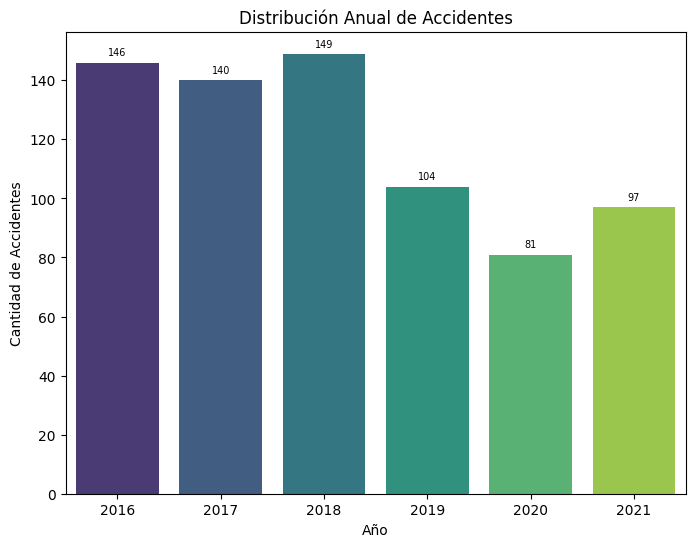

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grafico con la distribucion anual de los accidentes
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=df_homicidios['Año'], palette='viridis')
plt.title('Distribución Anual de Accidentes')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')

# Agregar el total en la parte superior de las barras con texto ajustable
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 7), textcoords='offset points', fontsize=7)  # Ajusta el tamaño del texto aquí

plt.show()


Para analizar mas profundo año por año la distribución de accidentes vamos a verlo año por año como es la tendencia, viendo como se aplana en el 2020 por la pandemia.

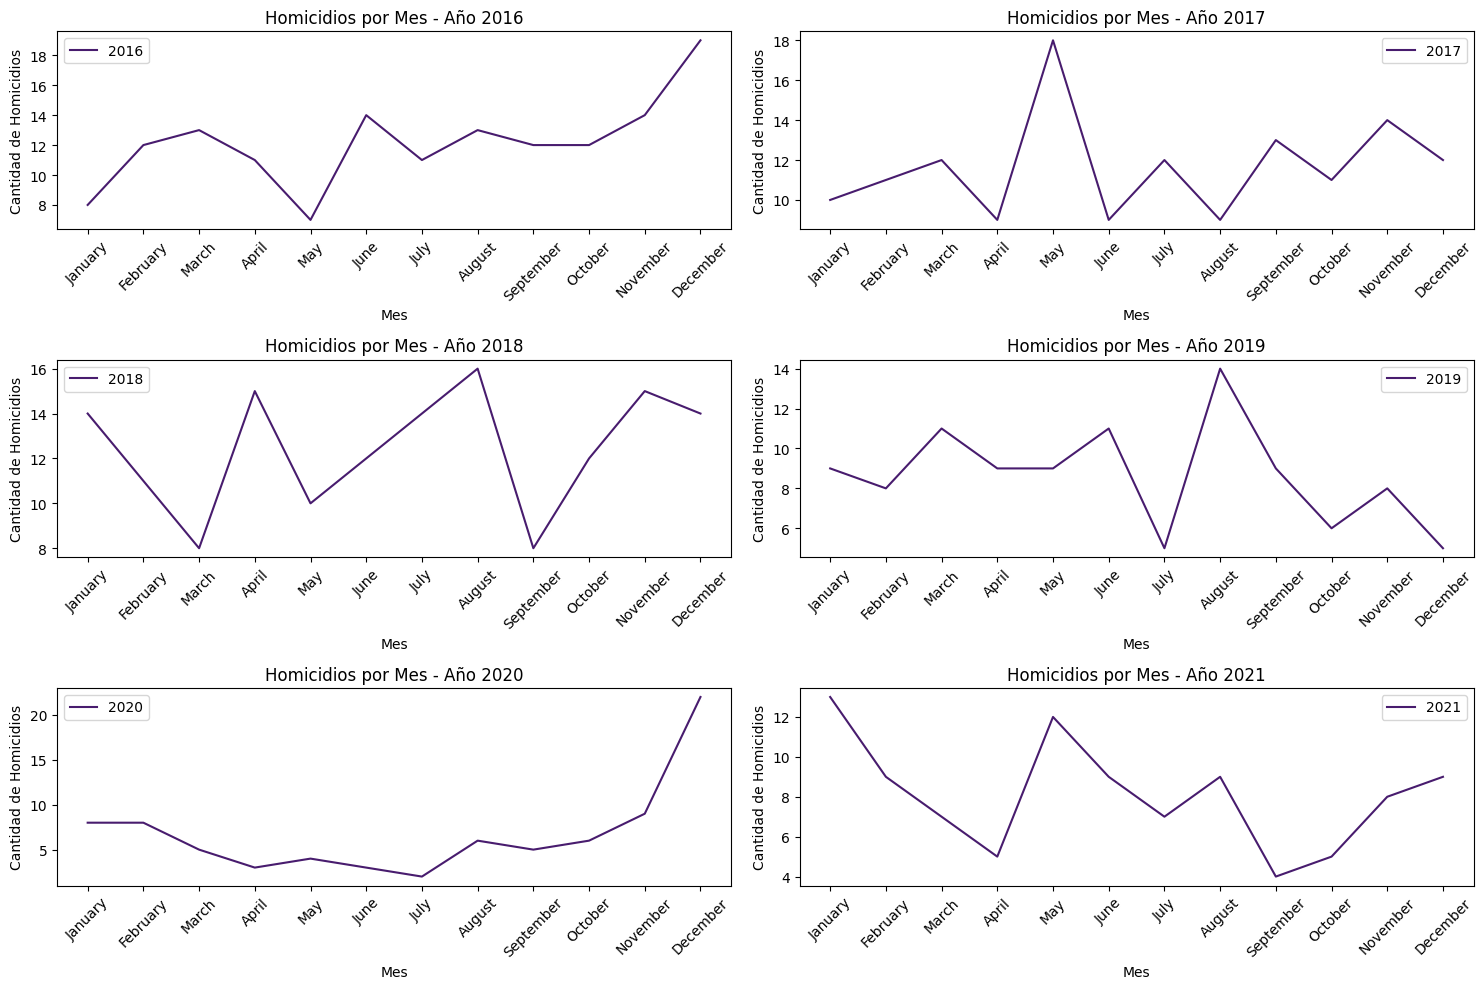

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

# Asumiendo que ya tienes df_homicidios
# Si no, carga tus datos como df_homicidios

# Convertir la columna 'Fecha' a tipo datetime
df_homicidios['Fecha'] = pd.to_datetime(df_homicidios['Fecha'])

# Crear columnas de 'Año' y 'Mes' como enteros
df_homicidios['Año'] = df_homicidios['Fecha'].dt.year
df_homicidios['Mes'] = df_homicidios['Fecha'].dt.month

# Configurar el estilo de seaborn para usar los colores de viridis
sns.set_palette("viridis", n_colors=12)

# Obtener los años únicos presentes en la columna 'Año'
unique_years = df_homicidios['Año'].unique()

# Crear subgráficos en una matriz de 3x2
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))

# Iterar sobre cada año
for i, year in enumerate(unique_years):
    # Calcular la posición en la matriz
    row = i // 2
    col = i % 2

    # Filtrar el DataFrame para el año actual
    df_year = df_homicidios[df_homicidios['Año'] == year]

    # Contar los homicidios por mes
    count_by_month = df_year.groupby('Mes').size()

    # Crear el gráfico de líneas
    sns.lineplot(x=count_by_month.index.map(lambda x: calendar.month_name[x]), y=count_by_month.values, ax=axes[row, col], label=str(year))

    # Configurar etiquetas y título
    axes[row, col].set_title(f'Homicidios por Mes - Año {year}')
    axes[row, col].set_ylabel('Cantidad de Homicidios')

    # Rotar las etiquetas de los meses a 45 grados
    axes[row, col].tick_params(axis='x', rotation=45)

# Configurar etiquetas en el eje x para el último subgráfico
axes[-1, 0].set_xlabel('Mes')
axes[-1, 1].set_xlabel('Mes')

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


## Distribución mensual de accidentes


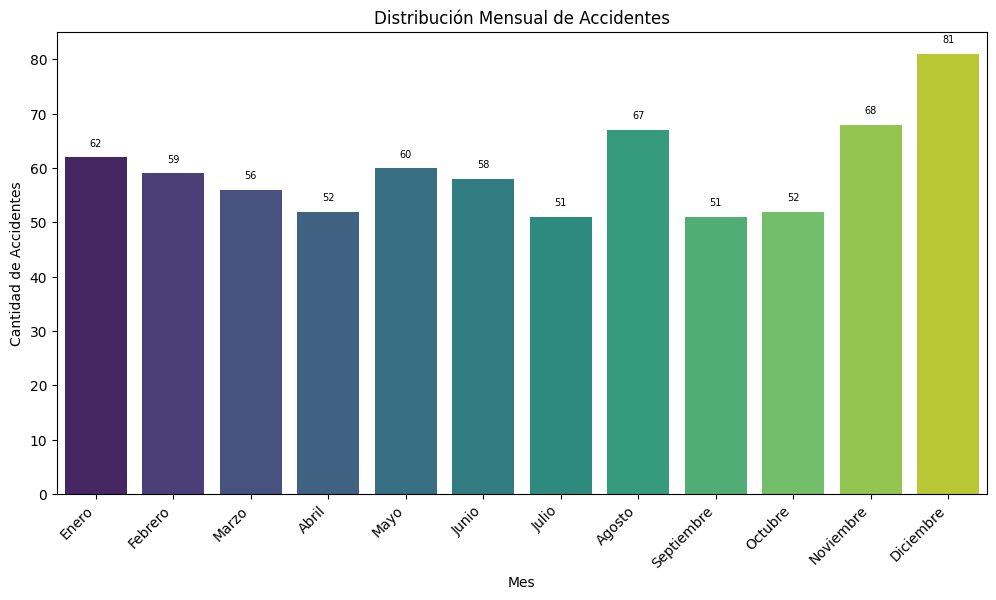

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que tu DataFrame tiene una columna llamada 'Total' con la cantidad total en cada mes.
# Asegúrate de reemplazar 'Total' con el nombre correcto de tu columna.

# Crear un diccionario para mapear los números de mes a sus nombres
meses = {1: 'Enero', 2: 'Febrero', 3: 'Marzo', 4: 'Abril', 5: 'Mayo', 6: 'Junio',
         7: 'Julio', 8: 'Agosto', 9: 'Septiembre', 10: 'Octubre', 11: 'Noviembre', 12: 'Diciembre'}

# Mapear los números de mes a sus nombres en el DataFrame
df_homicidios['Mes'] = df_homicidios['Mes'].map(meses)

plt.figure(figsize=(12, 6))

# Crear el gráfico de barras
ax = sns.countplot(x=df_homicidios['Mes'], palette='viridis')

# Rotar las etiquetas en un ángulo de 45 grados
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Mostrar el total (número entero) en cada barra con texto ajustable
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize= 7)  # Ajusta el tamaño del texto aquí

plt.title('Distribución Mensual de Accidentes')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Accidentes')
plt.show()


## Distribución semanal de accidentes

Vemos como se disrtibuyen los accidentes en base a la semana de lunes a domingo

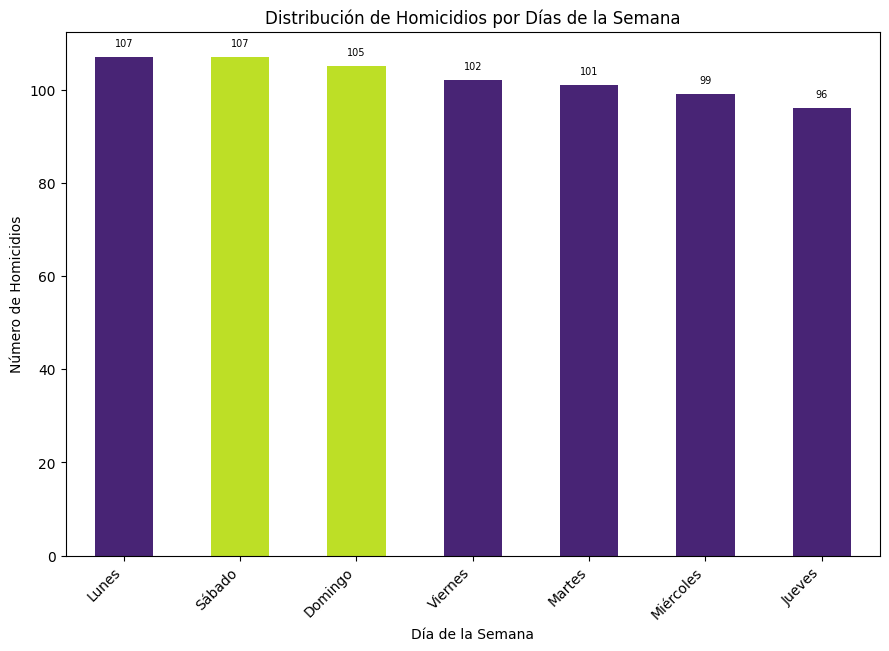

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm


# Graficar la distribución con colores específicos
plt.figure(figsize=(9, 12))

# Primer gráfico
plt.subplot(2, 1, 1)
ax = dias_semana_counts.plot(kind='bar', color=colores)
plt.title('Distribución de Homicidios por Días de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Homicidios')

# Girar los días de la semana a 45 grados
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Agregar el total de cada columna en la parte superior de las barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7)

plt.tight_layout()
plt.show()


Y aqui vemos como se distribuyen los días de la semana en base a la cantidad de accidentes por día

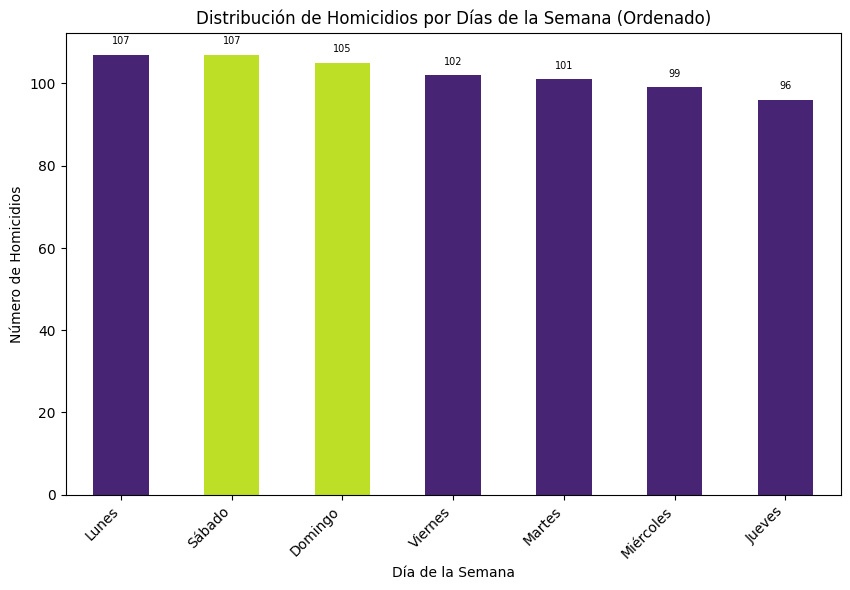

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Convertir la columna 'Fecha' a formato datetime
df_homicidios['Fecha'] = pd.to_datetime(df_homicidios['Fecha'])

# Obtener el día de la semana en español y contar la frecuencia
dias_semana_espanol = {
    0: 'Lunes',
    1: 'Martes',
    2: 'Miércoles',
    3: 'Jueves',
    4: 'Viernes',
    5: 'Sábado',
    6: 'Domingo'
}

df_homicidios['Dia_semana'] = df_homicidios['Fecha'].dt.dayofweek.map(dias_semana_espanol)
dias_semana_counts = df_homicidios['Dia_semana'].value_counts()

# Días de la semana en español
dias_ordenados_espanol = ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes', 'Sábado', 'Domingo']
dias_semana_counts = dias_semana_counts.reindex(dias_ordenados_espanol, fill_value=0)

# Ordenar de mayor a menor
dias_semana_counts = dias_semana_counts.sort_values(ascending=False)

# Obtener dos colores de la paleta viridis
viridis_cmap = cm.get_cmap('viridis')
color_blue = viridis_cmap(0.1)  # Seleccionar un tono azul
color_orange = viridis_cmap(0.9)  # Seleccionar un tono naranja

# Colores
colores = [color_blue if dia in ['Lunes', 'Martes', 'Miércoles', 'Jueves', 'Viernes'] else color_orange for dia in dias_semana_counts.index]

# Graficar la distribución con colores específicos
plt.figure(figsize=(10, 6))
ax = dias_semana_counts.plot(kind='bar', color=colores)
plt.title('Distribución de Homicidios por Días de la Semana (Ordenado)')
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Homicidios')

# Girar los días de la semana a 45 grados
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Agregar el total de cada columna en la parte superior de las barras
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points',fontsize=7)

plt.show()


## Distribución diaria de accidentes


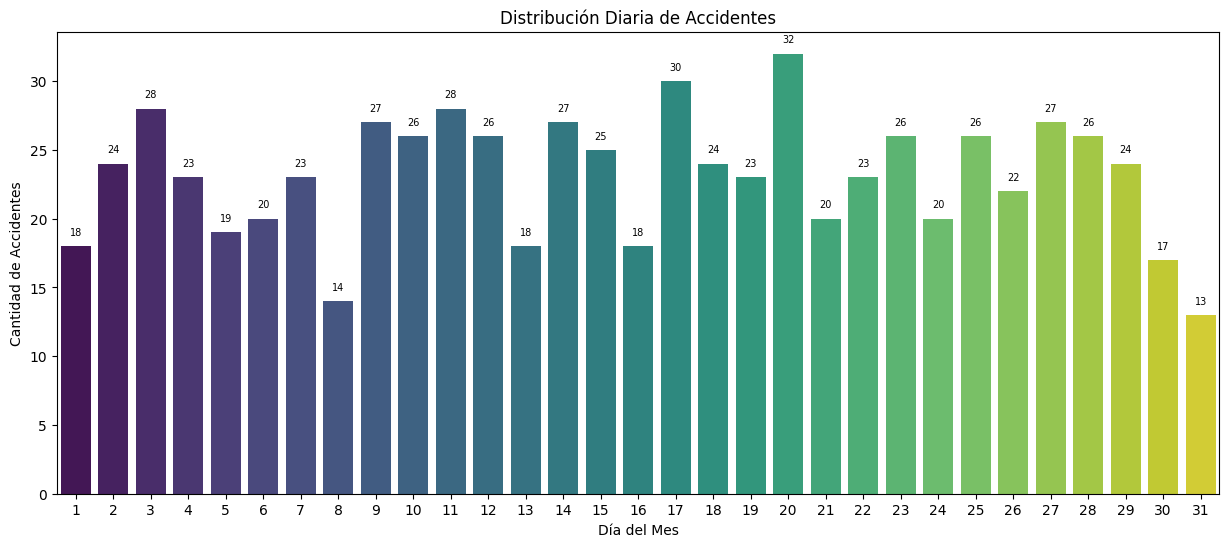

In [38]:
# Graficar la distribución con colores específicos
plt.figure(figsize=(15, 6))
ax = sns.countplot(x=df_homicidios['Día'], palette='viridis')
plt.title('Distribución Diaria de Accidentes')
plt.xlabel('Día del Mes')
plt.ylabel('Cantidad de Accidentes')

# Agregar el total en la parte superior de las barras con texto ajustable
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7)  # Ajusta el tamaño del texto aquí

plt.show()

## Distribución horaria de accidentes

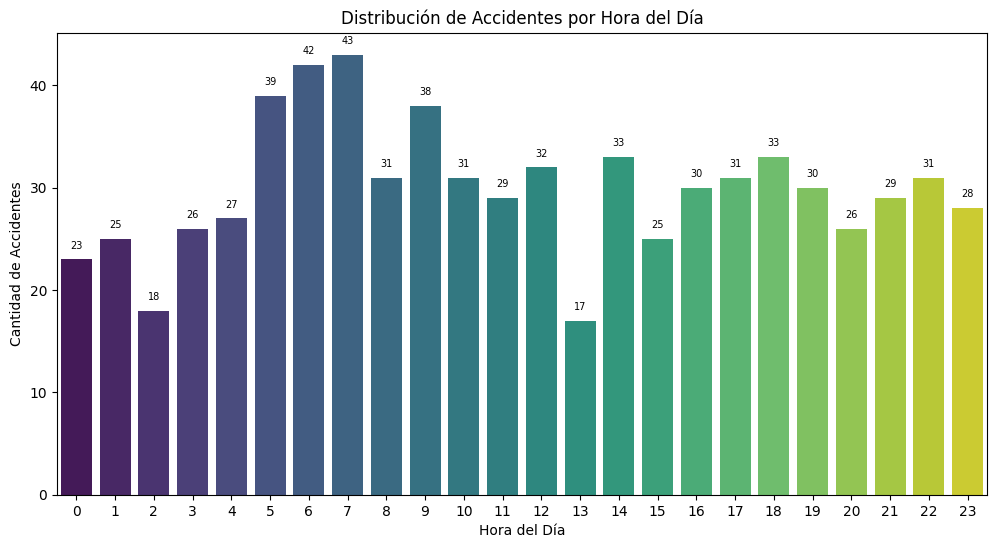

In [39]:
# Graficar la distribución con colores específicos
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=df_homicidios['Hora entera'], palette='viridis')
plt.title('Distribución de Accidentes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Cantidad de Accidentes')

# Agregar el total en la parte superior de las barras con texto ajustable
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=7)  # Ajusta el tamaño del texto aquí

plt.show()

## Distribución geográfica de accidentes

### Mapa de lugar de accidente

In [40]:
import folium
from folium.plugins import HeatMap

# Crear un mapa centrado en Buenos Aires
mapa_buenos_aires = folium.Map(location=[-34.6037, -58.3816], zoom_start=12.5)

# Agregar marcadores al mapa para cada accidente
for index, row in df_homicidios.iterrows():
    info = f"""
    Accidente:{row['Id']}
    Fecha:{row['Fecha']}
    Edad:{row['Edad']}
    """
    folium.Marker([row['Pos y'], row['Pos x']],
                  popup=folium.Popup(html=info, parse_html=True),
                  icon=folium.Icon(color='red', icon='warning', prefix='fa')).add_to(mapa_buenos_aires)

# Mostrar el mapa en el cuaderno
mapa_buenos_aires


### Mapa de calor

Este código genera un mapa interactivo centrado en Buenos Aires y lo complementa con un mapa de calor que representa la densidad de homicidios en la ciudad. Los puntos más intensos en el mapa de calor indican áreas con una mayor concentración de homicidios. Este tipo de representación es útil para visualizar patrones espaciales y concentraciones de eventos en un área geográfica.

Vamos a ver dos tipos de mapas de calor:

**Opción 1**: con libreria `folium`

In [41]:
import folium
from folium.plugins import HeatMap

# Crear un mapa centrado en Buenos Aires
mapa_buenos_aires = folium.Map(location=[-34.6037, -58.3816], zoom_start=12)

# Crear un mapa de calor con las coordenadas de los accidentes
heat_data = [[row['Pos y'], row['Pos x']] for index, row in df_homicidios.iterrows()]
HeatMap(heat_data).add_to(mapa_buenos_aires)

# Mostrar el mapa en el cuaderno
mapa_buenos_aires


**Opción 2**: con libreria `plotly.express`

In [42]:
import plotly.express as px

# Crear un DataFrame con las coordenadas y la frecuencia de homicidios
df_top_locations_freq = df_homicidios.groupby(['Pos y', 'Pos x']).size().reset_index(name='Frecuencia')

# Obtener la frecuencia máxima
max_frequency = df_top_locations_freq['Frecuencia'].max()

# Crear un mapa de calor interactivo con paleta de colores personalizada
fig = px.density_mapbox(df_top_locations_freq, lat='Pos y', lon='Pos x', z='Frecuencia',
                        radius=35, center=dict(lat=-34.6037, lon=-58.3816),
                        zoom=10, mapbox_style='open-street-map',
                        opacity=0.7,  # Opacidad de los puntos en el mapa de calor
                        title='Mapa de Calor Interactivo de Homicidios',
                        color_continuous_scale=px.colors.sequential.Reds,  # Usar paleta de rojos
                        range_color=(0, max_frequency))  # Establecer rango de colores


fig.show(width=400, height=400)

Histograma de edad

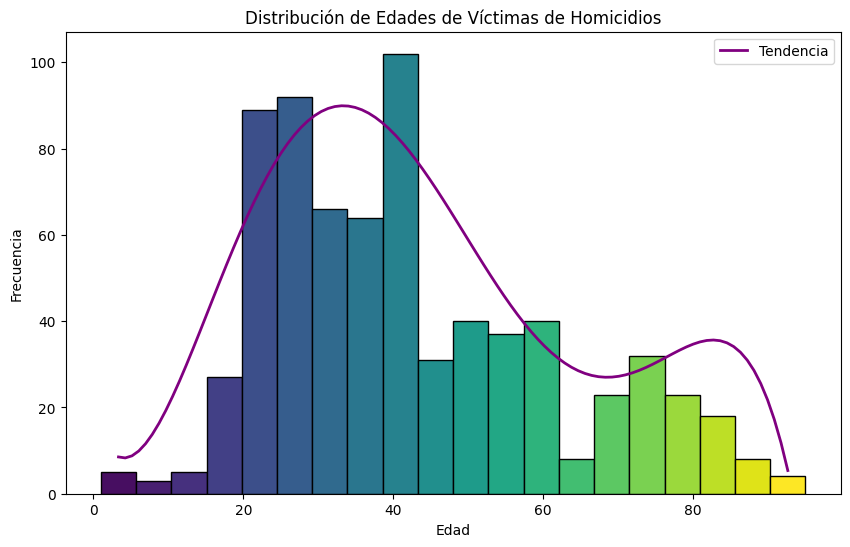

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

# Suponiendo que tu DataFrame se llama df_homicidios
# Asegúrate de que la columna 'Edad' sea de tipo numérico
df_homicidios['Edad'] = pd.to_numeric(df_homicidios['Edad'], errors='coerce')

# Elimina valores nulos en la columna 'Edad'
df_homicidios = df_homicidios.dropna(subset=['Edad'])

# Configuración del histograma con colormap 'viridis'
plt.figure(figsize=(10, 6))
n, bins, patches = plt.hist(df_homicidios['Edad'], bins=20, edgecolor='black')

# Colorear las barras utilizando el colormap 'viridis'
colormap = cm.viridis
bin_centers = 0.5 * (bins[:-1] + bins[1:])
colores = colormap(bin_centers / bin_centers.max())

for patch, color in zip(patches, colores):
    patch.set_facecolor(color)

# Ajustar una curva suave (polinomio de grado 3 en este caso) con menos influencia del término de grado superior
x_vals = np.linspace(min(bin_centers), max(bin_centers), 100)
coefficients = np.polyfit(bin_centers, n, 5)  # Reducir el grado
y_vals = np.polyval(coefficients, x_vals)

# Dibujar la línea de tendencia desde el valor 10 en el eje y
plt.plot(x_vals, y_vals + 10, color='purple', linestyle='-', linewidth=2, label='Tendencia')

# Etiquetas y título
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Distribución de Edades de Víctimas de Homicidios')

# Leyenda
plt.legend()

# Mostrar el histograma
plt.show()


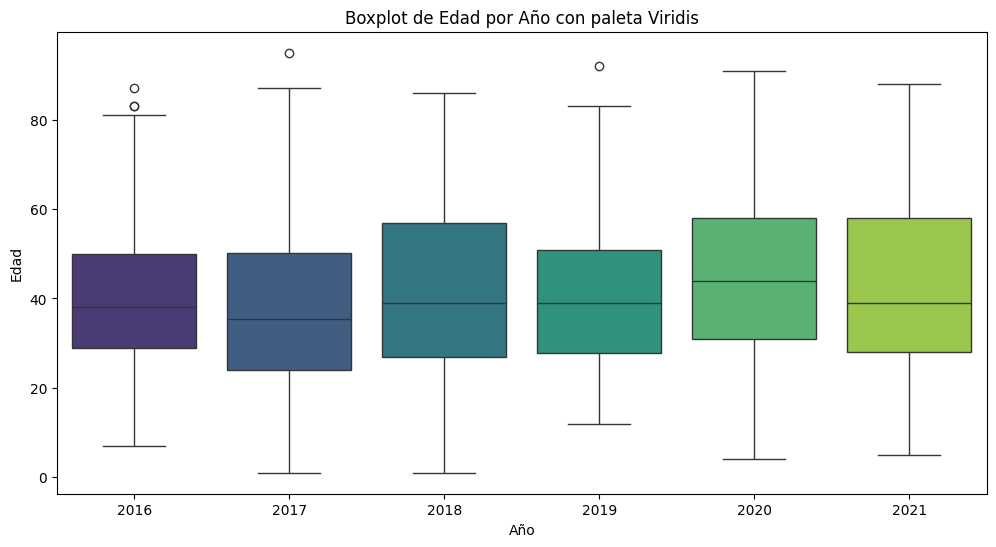

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='Edad', data=df_homicidios, palette='viridis')
plt.title('Boxplot de Edad por Año con paleta Viridis')
plt.xlabel('Año')
plt.ylabel('Edad')
plt.show()


### Distribucion de victimas por año y por genero

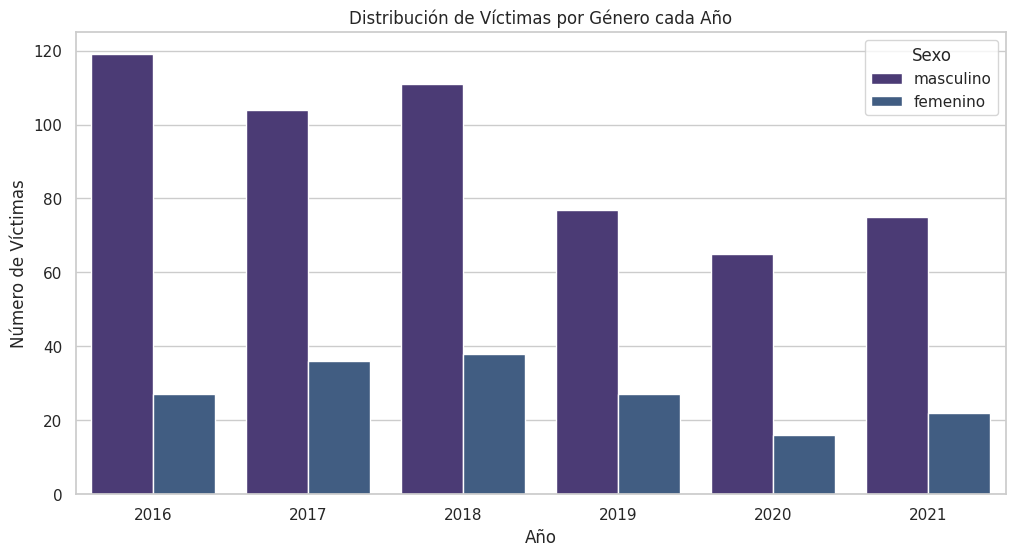

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que ya tienes cargado tu DataFrame 'df_homicidios'

# Crear una columna para el género convertida a minúsculas
df_homicidios['Sexo'] = df_homicidios['Sexo'].str.lower()

# Crear un gráfico de barras utilizando seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Utilizar la paleta de colores 'viridis'
sns.set_palette("viridis")

# Crear el gráfico de barras
ax = sns.countplot(x='Año', hue='Sexo', data=df_homicidios)

# Añadir etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Número de Víctimas')
ax.set_title('Distribución de Víctimas por Género cada Año')

# Mostrar el gráfico
plt.show()


### Distribución de Víctimas por Género cada Año

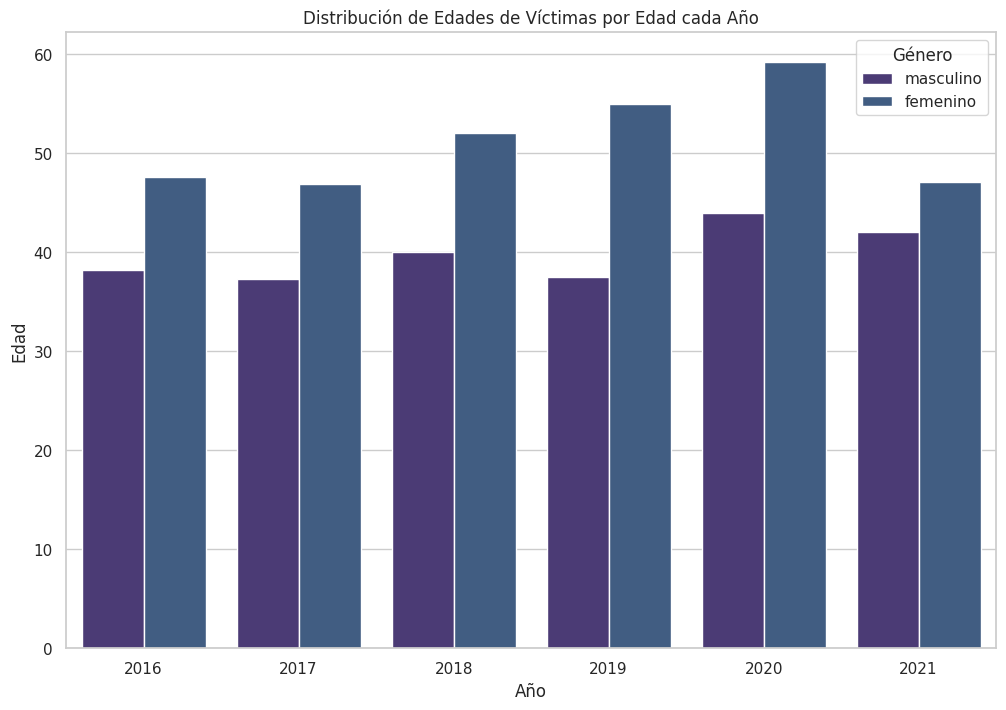

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Crear un gráfico de barras utilizando seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Utilizar la paleta de colores 'viridis'
sns.set_palette("viridis")

# Crear el gráfico de barras
ax = sns.barplot(x='Año', y='Edad', hue='Sexo', data=df_homicidios, ci=None)

# Añadir etiquetas y título
ax.set_xlabel('Año')
ax.set_ylabel('Edad')
ax.set_title('Distribución de Edades de Víctimas por Edad cada Año')

# Ajustar la leyenda
ax.legend(title='Género', loc='upper right')

# Mostrar el gráfico
plt.show()


In [47]:
# Agrupar por Año y Sexo y contar la cantidad de accidentes
df_resultado = df_homicidios.groupby(['Año', 'Sexo']).size().reset_index(name='Cantidad homicidios')

# Mostrar el DataFrame resultante
df_resultado

,Año,Sexo,Cantidad homicidios
0,2016,femenino,27
1,2016,masculino,119
2,2017,femenino,36
3,2017,masculino,104
4,2018,femenino,38
5,2018,masculino,111
6,2019,femenino,27
7,2019,masculino,77
8,2020,femenino,16
9,2020,masculino,65


### Dispersión de las edades segun el rol

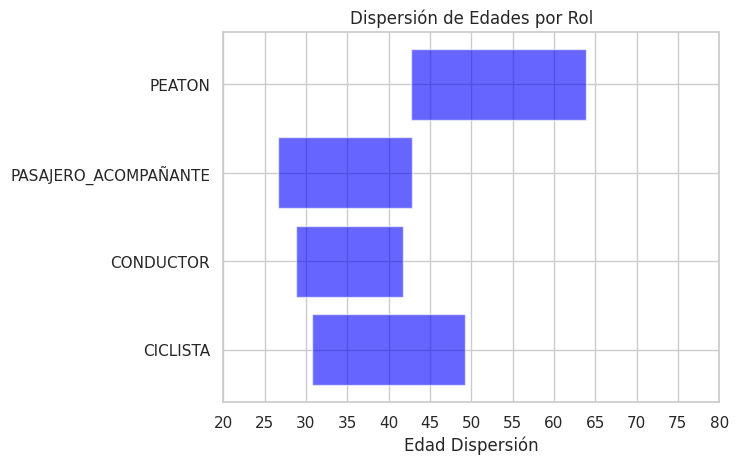

In [48]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Cargar el DataFrame
# Asumo que ya tienes cargado el DataFrame df_homicidios

# Calcular la edad promedio y la dispersión de edades por rol
summary_data = df_homicidios.groupby('Rol')['Edad'].agg(['mean', 'std']).reset_index()

# Configurar el gráfico
fig, ax = plt.subplots()

# Dibujar barras horizontales por rol con el esquema de colores "viridis"
for index, row in summary_data.iterrows():
    rol = row['Rol']
    edad_promedio = row['mean']
    dispersion = row['std']

    ax.barh(rol, dispersion, left=edad_promedio-dispersion/2, color='blue', alpha=0.6)

# Configurar etiquetas y título
ax.set_xlabel('Edad Dispersión')
ax.set_title('Dispersión de Edades por Rol')

# Configurar el rango del eje X y el espaciado de los ticks
ax.set_xlim(20, 80)
ax.set_xticks(np.arange(20, 81, 5))
ax.set_xticklabels(np.arange(20, 81, 5))

# Mostrar el gráfico
plt.show()


### Dispersión de las edades y en la movilización de las víctimas

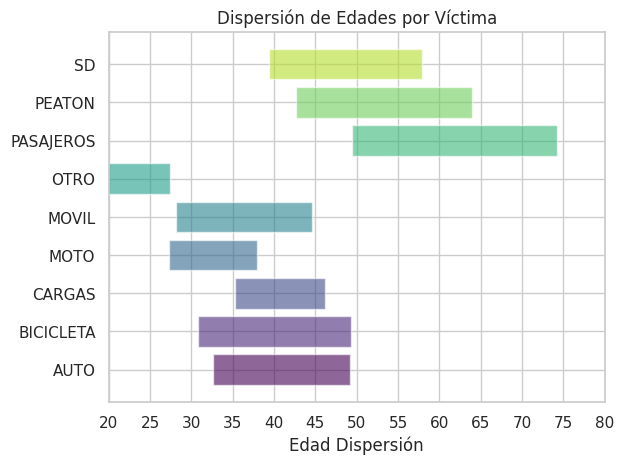

In [49]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Cargar el DataFrame
# Asumo que ya tienes cargado el DataFrame df_homicidios

# Calcular la edad promedio y la dispersión de edades por rol
summary_data = df_homicidios.groupby('Víctima')['Edad'].agg(['mean', 'std']).reset_index()

# Configurar el gráfico
fig, ax = plt.subplots()

# Dibujar barras horizontales por rol con el esquema de colores "viridis"
for index, row in summary_data.iterrows():
    rol = row['Víctima']
    edad_promedio = row['mean']
    dispersion = row['std']

    ax.barh(rol, dispersion, left=edad_promedio-dispersion/2, color=plt.cm.viridis(index/len(summary_data)), alpha=0.6)

# Configurar etiquetas y título
ax.set_xlabel('Edad Dispersión')
ax.set_title('Dispersión de Edades por Víctima')

# Configurar el rango del eje X y el espaciado de los ticks
ax.set_xlim(20, 80)
ax.set_xticks(np.arange(20, 81, 5))
ax.set_xticklabels(np.arange(20, 81, 5))

# Mostrar el gráfico
plt.show()


### Canidad de victimas en tipo de calle y en cruce

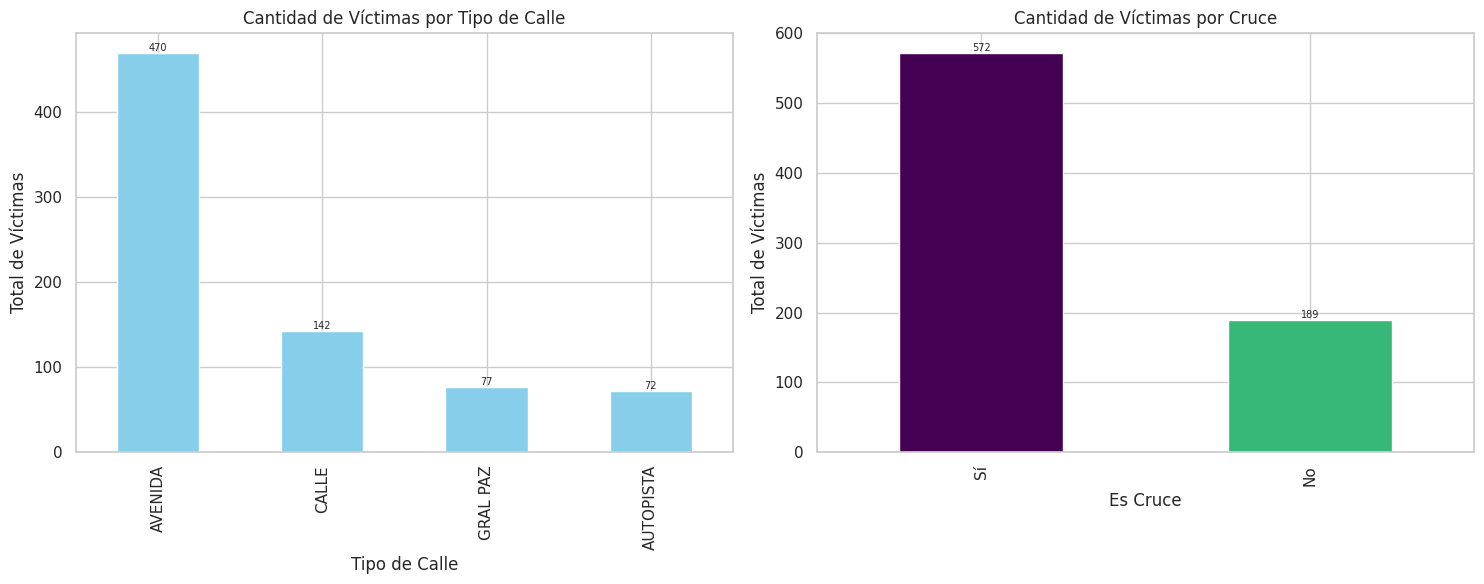

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que ya tienes el DataFrame df_homicidios cargado

# Visualización: cantidad de víctimas por tipo de calle (inversión de ejes y ordenado)
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Agrupar por tipo de calle y sumar las víctimas, luego ordenar de mayor a menor
tipo_calle_data = df_homicidios.groupby('Tipo de calle')['N victimas'].sum().sort_values(ascending=False)

# Crear el primer gráfico de barras con ejes invertidos
tipo_calle_plot = tipo_calle_data.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Cantidad de Víctimas por Tipo de Calle')
axes[0].set_xlabel('Tipo de Calle')
axes[0].set_ylabel('Total de Víctimas')

# Añadir etiquetas con el total en la parte superior de cada barra
for i, v in enumerate(tipo_calle_data):
    axes[0].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=7)

# Visualización: cantidad de víctimas por cruces (ordenado y colores vívidos)
df_homicidios['Es Cruce'] = df_homicidios['Cruce'].apply(lambda x: 'Sí' if x == 'SI' else 'No')
cruces_data = df_homicidios.groupby('Es Cruce')['N victimas'].sum().sort_values(ascending=False)

# Crear el segundo gráfico de barras con colores vívidos y ejes invertidos
cruces_plot = cruces_data.plot(kind='bar', ax=axes[1], color=plt.cm.viridis_r(cruces_data / cruces_data.max()))
axes[1].set_title('Cantidad de Víctimas por Cruce')
axes[1].set_xlabel('Es Cruce')
axes[1].set_ylabel('Total de Víctimas')

# Añadir etiquetas con el total en la parte superior de cada barra
for i, v in enumerate(cruces_data):
    axes[1].text(i, v + 0.1, str(v), ha='center', va='bottom', fontsize=7)

# Ajustes de diseño y presentación
plt.tight_layout()
plt.show()


### Acusados en los hechos